# Simulación de anomalías gravitacionales

Autor: Julio César Fernández Kolmer

# Práctica de gravimetría - Física de la Tierra
 
 El archivo `gravity_profile.dat` contiene mediciones de distancia horizontal (1ª columna), topografía (2ª columna) y gravedad (3ª columna) a lo largo de un perfil cerca de Manzanares el Real (latitud: 40.72627° N, longitud: -3.86265° W). 
 El perfil atraviesa una intrusión de gabro (densidad = 3100 kg/m³) con una geometría aproximadamente esférica. 
 La densidad media de la corteza a lo largo del perfil es de 2670 kg/m³.

1. Representar los datos de gravedad y topografía a lo largo del perfil
Cargar y representar los datos


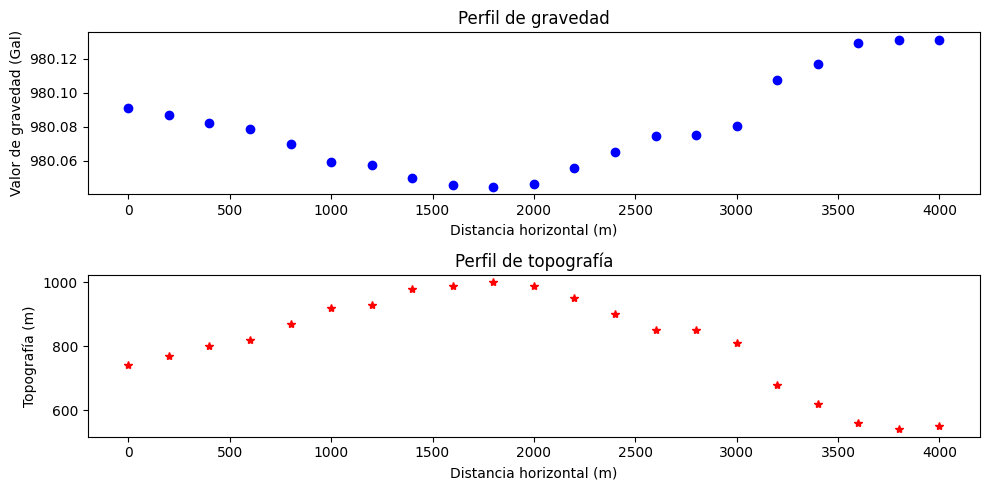

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("gravity_profile.dat")

x = data[:21, 0]
h = data[:21, 1]
g = data[:21, 2]  # Datos en gales

# Introducir ruido aleatorio
np.random.seed(42)
g = g + g * 1.5e-6 * (2 * np.random.rand(len(x)) - 1)



# Cargar datos con ruido
data_random = np.loadtxt("gravity_profile_random.dat")

x = data_random[:21, 0]
h = data_random[:21, 1]
g = data_random[:21, 2]

# Representar gravedad y topografía
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(x, g, 'bo')
plt.xlabel('Distancia horizontal (m)')
plt.ylabel('Valor de gravedad (Gal)')
plt.title('Perfil de gravedad')

plt.subplot(2, 1, 2)
plt.plot(x, h, 'r*')
plt.xlabel('Distancia horizontal (m)')
plt.ylabel('Topografía (m)')
plt.title('Perfil de topografía')

plt.tight_layout()
plt.show()

# 2. Calcular y representar las anomalías de aire libre y de Bouguer simple

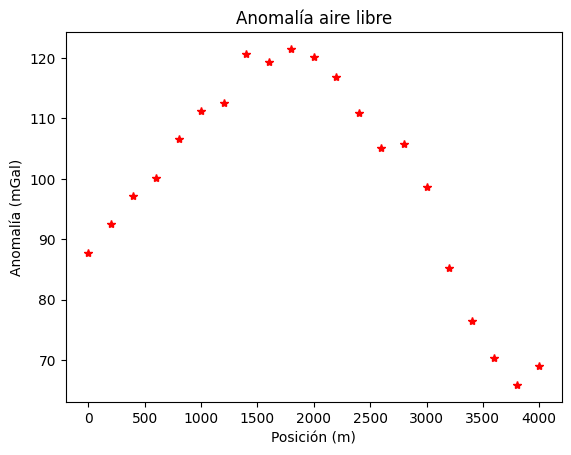

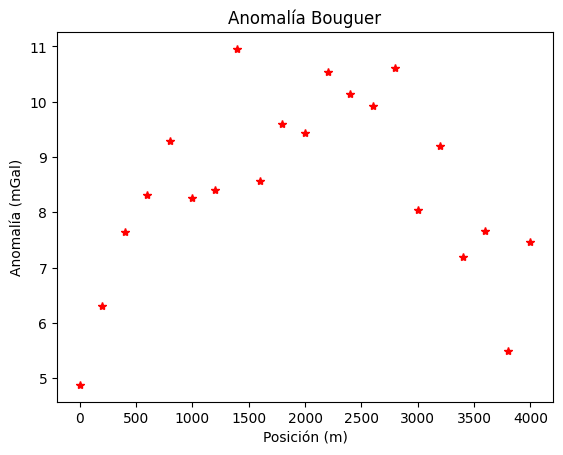

In [2]:
# Corrección aire libre
phi = 40.726  # Latitud en grados
g_elipsoide = 9.7803 * (1 + (5.30244e-3) * (np.sin(np.radians(phi))**2) - (5.8e-6 * (np.sin(2 * np.radians(phi))**2)))
g_elipsoide_mg = g_elipsoide * 1e5

deltaG_air_free = g * 1e3 + 0.3086 * h - g_elipsoide_mg

plt.figure()
plt.plot(x, deltaG_air_free, '*r')
plt.title('Anomalía aire libre')
plt.xlabel('Posición (m)')
plt.ylabel('Anomalía (mGal)')
plt.show()

# Corrección Bouguer
deltaG_bouguer = g * 1e3 + 0.3086 * h - 0.1119 * h - g_elipsoide_mg

plt.figure()
plt.plot(x, deltaG_bouguer, '*r')
plt.title('Anomalía Bouguer')
plt.xlabel('Posición (m)')
plt.ylabel('Anomalía (mGal)')
plt.show()


### 3. Estimación del radio y profundidad

Suponiendo que el centro de la esfera se encuentra en la mitad del perfil, estimar su radio \( R \) y profundidad \( z \) a partir de la semianchura de la anomalía de gravedad máxima, según las siguientes expresiones:

$$
\Delta g_{sp}(x,z) = \Delta g_{max} \frac{1}{{(1+(x/z)^2)}^{3/2}}
$$

$$
\Delta g_{max} = \frac{4\pi G \rho R^3}{3z^2}
$$

$$
x_{1/2} = \sqrt{2^{2/3}-1} \cdot z
$$

Representar los datos de anomalía de gravedad de Bouguer de entrada y la anomalía de gravedad predicha de la esfera para los valores estimados de radio y profundidad.

---



Media de la anomalía de Bouguer: 8.471655216345209
Puntos de corte con la media: [3271.54806388  846.55035203]
Anchura media de la curva(m): 2424.9977118561765


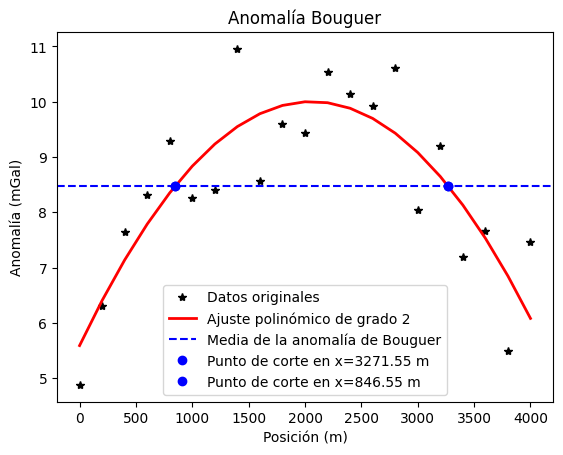

In [20]:
# Media de la anomalía
media_datos_anomalia = np.mean(deltaG_bouguer)
print("Media de la anomalía de Bouguer:", media_datos_anomalia)

#Ajuste inicial de los datos:
grado = 2
coeficientes = np.polyfit(x, deltaG_bouguer, grado)
#print(coeficientes)
# Generar el polinomio ajustado
polinomio = np.poly1d(coeficientes)
y_ajustado = polinomio(x)

#Hallar la anchura media de nuestra curva

# Hallar los cortes entre la media y el ajuste
# Restamos la media de la anomalía al polinomio
polinomio_residual = polinomio - media_datos_anomalia

# Encontramos las raíces de esta función (puntos de corte)
cortes = np.roots(polinomio_residual)
print("Puntos de corte con la media:", cortes)
anchura_media = cortes[0] - cortes[1]
print("Anchura media de la curva(m):", anchura_media)


plt.figure()
plt.plot(x, deltaG_bouguer, '*k', label='Datos originales')
plt.plot(x, y_ajustado, label=f'Ajuste polinómico de grado {grado}', color='red', linewidth=2)
plt.axhline(y=media_datos_anomalia, color='b', linestyle='--', label='Media de la anomalía de Bouguer')
# Mostrar los cortes en el gráfico
for corte in cortes:
    if min(x) <= corte <= max(x):  # Asegurarse de que el corte esté dentro del rango de x
        plt.plot(corte, media_datos_anomalia, 'bo')  # Marcamos los puntos de corte
        plt.plot(corte, media_datos_anomalia, 'bo', label=f'Punto de corte en x={corte:.2f} m')



plt.title('Anomalía Bouguer')
plt.xlabel('Posición (m)')
plt.ylabel('Anomalía (mGal)')
plt.legend()
plt.show()


Una vez hemos calculado la anchura media calculamos la z, la profundidad de la esfera con la ecuación:

$$
x_{1/2} = \sqrt{2^{2/3}-1} \cdot z
$$

$$
z = \frac{x_{1/2}}{\sqrt{2^{2/3}-1}}
$$

In [16]:
z = anchura_media/np.sqrt(2**(2/3) - 1)
print("profundidad de la esfera:", z)

profundidad de la esfera: 3164.0546287801344


Ahora hayamos el radio de la esfera con la siguiente ecuación:
$$
\Delta g_{max} = \frac{4\pi G \rho R^3}{3z^2}
$$

$$
R = \left[ \frac{3z^2 \cdot \Delta g_{max}}{4 \pi G \rho} \right] ^\frac{1}{3}
$$



### 4. Estimación de la incertidumbre

Considerar intervalos del ±50% para el radio \( R \) y la profundidad \( z \) obtenidos en la sección anterior. Calcular el error de ajuste (*misfit*) para todas las combinaciones posibles de \( R \) y \( z \), tomando 100 puntos para cada intervalo.

$$
\text{misfit} = \frac{\sum{(\Delta g_{sp} - \Delta g_{\text{Boug}})^2}}{n-1}
$$

Representar el error de ajuste en función de \( R \) y \( z \).

Encontrar el error de ajuste (*misfit*) mínimo y los valores de \( R \) y \( z \) asociados. Representar los valores de \( R \) y \( z \) dentro de los intervalos cuyo *misfit* sea menor al 10% del valor mínimo de *misfit*. Representar también los valores de \( R \) y \( z \) para el modelo de *misfit* mínimo y para el modelo estimado en la sección 3 a partir de la semianchura de la anomalía de gravedad.

Representar los datos de anomalía de gravedad de Bouguer de entrada y la anomalía de gravedad predicha de la esfera para:

1. El modelo de *misfit* mínimo dentro de los intervalos.
2. El modelo estimado en la sección 3 a partir de la semianchura de la anomalía de gravedad.


## 3. Estimación del radio (R) y profundidad (z)
Suponiendo que el centro de la esfera se encuentra en la mitad del perfil, estimar su radio y profundidad 
a partir de la semianchura de la anomalía de gravedad máxima.

## 4. Estimación de la incertidumbre
Considerar intervalos del ±50% para el radio (R) y la profundidad (z) obtenidos en la sección anterior.
Calcular el error de ajuste (misfit) para todas las combinaciones posibles de R y z, tomando 100 puntos para cada intervalo.
Representar el error de ajuste en función de R y z.
Encontrar el error de ajuste (misfit) mínimo y los valores de R y z asociados.
Representar los valores de R y z dentro de los intervalos cuyo misfit sea menor al 10% del valor mínimo de misfit.

In [ ]:
Y = at.spherical_harmonic(l=2, m=2)